## 이론적인 Naked & Covered Position 전략

Naked Position은 기초 자산을 보유하지 않은 상태에서 옵션만 매도하는 전략이고, Covered Position은 기초 자산을 보유한 상태에서 옵션을 매도하는 전략입니다.


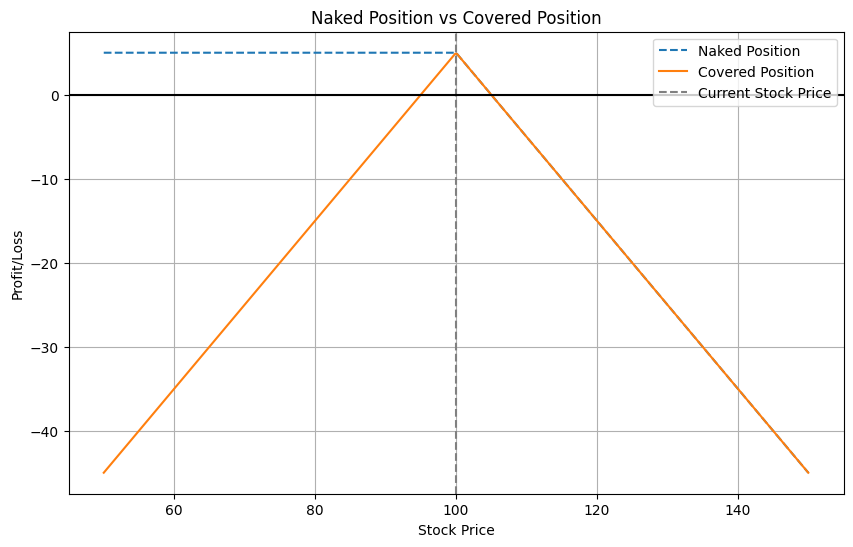

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def naked_position(stock_prices, K, option_premium):
    """
    Naked Position의 손익 계산 함수

    Parameters:
    stock_prices: 주식 가격의 배열
    K: 행사가격 (strike price)
    option_premium: 옵션 프리미엄

    Returns:
    Naked Position의 손익
    """
    # Naked Position의 손익 계산
    payoff = np.where(stock_prices > K, option_premium - (stock_prices - K), option_premium)
    return payoff

def covered_position(stock_prices, K, option_premium):
    """
    Covered Position의 손익 계산 함수

    Parameters:
    stock_prices: 주식 가격의 배열
    K: 행사가격 (strike price)
    option_premium: 옵션 프리미엄

    Returns:
    Covered Position의 손익
    """
    # Covered Position의 손익 계산
    payoff = np.where(stock_prices > K, option_premium - (stock_prices - K), option_premium + (stock_prices - K))
    return payoff

# 예제 파라미터
S0 = 100  # 현재 주식 가격
K = 100  # 행사가격
option_premium = 5  # 옵션 프리미엄

# 주식 가격 범위 설정
stock_prices = np.linspace(50, 150, 400)

# 손익 계산
naked_payoff = naked_position(stock_prices, K, option_premium)
covered_payoff = covered_position(stock_prices, K, option_premium)

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(stock_prices, naked_payoff, label='Naked Position', linestyle='--')
plt.plot(stock_prices, covered_payoff, label='Covered Position', linestyle='-')
plt.axvline(x=S0, color='grey', linestyle='--', label='Current Stock Price')
plt.axhline(y=0, color='black', linestyle='-')
plt.title('Naked Position vs Covered Position')
plt.xlabel('Stock Price')
plt.ylabel('Profit/Loss')
plt.legend()
plt.grid(True)
plt.show()


## 실제 데이터를 활용한 Naked & Covered Position 전략

[*********************100%%**********************]  1 of 1 completed


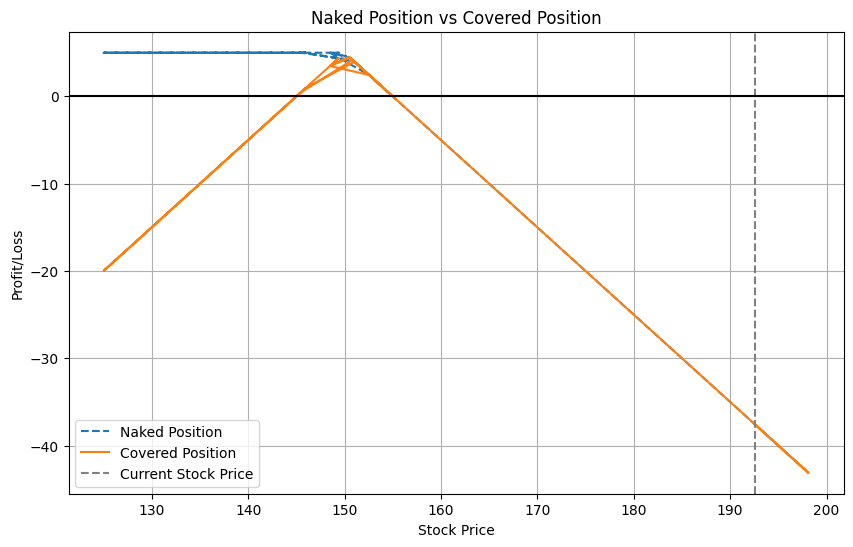

In [ ]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

def naked_position(stock_prices, K, option_premium):
    """
    Naked Position의 손익 계산 함수

    Parameters:
    stock_prices: 주식 가격의 배열
    K: 행사가격 (strike price)
    option_premium: 옵션 프리미엄

    Returns:
    Naked Position의 손익
    """
    # Naked Position의 손익 계산
    payoff = np.where(stock_prices > K, option_premium - (stock_prices - K), option_premium)
    return payoff

def covered_position(stock_prices, K, option_premium):
    """
    Covered Position의 손익 계산 함수

    Parameters:
    stock_prices: 주식 가격의 배열
    K: 행사가격 (strike price)
    option_premium: 옵션 프리미엄

    Returns:
    Covered Position의 손익
    """
    # Covered Position의 손익 계산
    payoff = np.where(stock_prices > K, option_premium - (stock_prices - K), option_premium + (stock_prices - K))
    return payoff

# yfinance를 사용하여 데이터 다운로드
ticker = 'AAPL'
data = yf.download(ticker, start="2023-01-01", end="2023-12-31")
stock_prices = data['Close'].values

# 예제 파라미터
K = 150  # 행사가격
option_premium = 5  # 옵션 프리미엄

# 손익 계산
naked_payoff = naked_position(stock_prices, K, option_premium)
covered_payoff = covered_position(stock_prices, K, option_premium)

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(stock_prices, naked_payoff, label='Naked Position', linestyle='--')
plt.plot(stock_prices, covered_payoff, label='Covered Position', linestyle='-')
plt.axvline(x=stock_prices[-1], color='grey', linestyle='--', label='Current Stock Price')
plt.axhline(y=0, color='black', linestyle='-')
plt.title('Naked Position vs Covered Position')
plt.xlabel('Stock Price')
plt.ylabel('Profit/Loss')
plt.legend()
plt.grid(True)
plt.show()
